<a href="https://colab.research.google.com/github/sneha5678-cmyk/12-FEB-2025/blob/main/movies_mystery_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

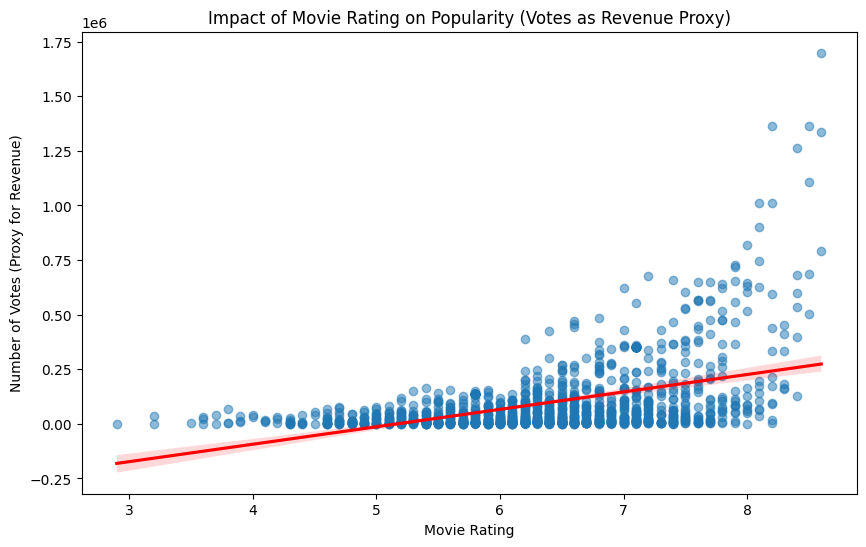

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/mystery_series.csv"
df = pd.read_csv(file_path)

# Data Cleaning
df = df.dropna(subset=["Rating", "Number of Votes"])  # Remove rows with missing values
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")  # Convert Rating to numeric
df["Number of Votes"] = pd.to_numeric(df["Number of Votes"], errors="coerce")  # Convert Votes to numeric

# Remove invalid entries
df = df.dropna().query("Rating > 0 and `Number of Votes` > 0")

# Visualization
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Rating"], y=df["Number of Votes"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Movie Rating")
plt.ylabel("Number of Votes (Proxy for Revenue)")
plt.title("Impact of Movie Rating on Popularity (Votes as Revenue Proxy)")
plt.show()


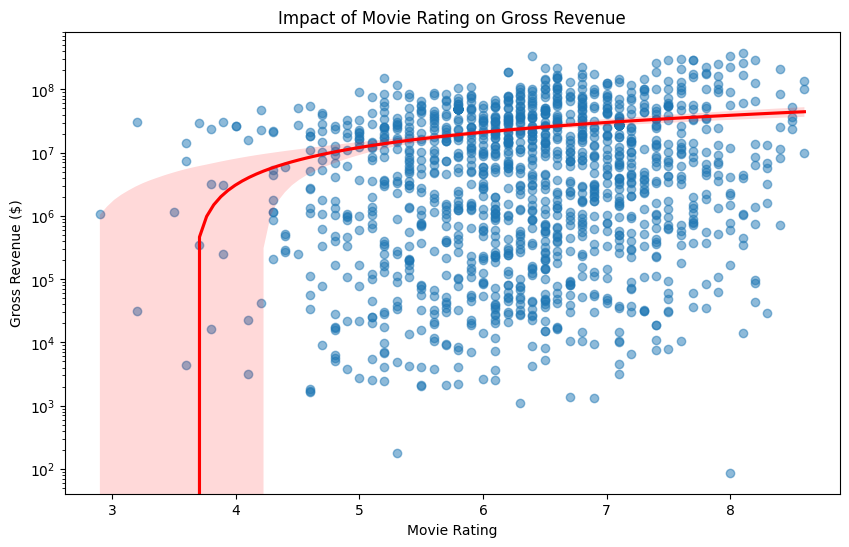

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/mystery_series.csv"
df = pd.read_csv(file_path)

# Data Cleaning
df = df.dropna(subset=["Rating", "Gross Revenue"])  # Remove rows with missing values
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")  # Convert Rating to numeric

# Convert Gross Revenue to numeric (removing commas)
df["Gross Revenue"] = df["Gross Revenue"].astype(str).str.replace(",", "").astype(float)

# Remove invalid entries
df = df.dropna().query("Rating > 0 and `Gross Revenue` > 0")

# Visualization
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Rating"], y=df["Gross Revenue"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Movie Rating")
plt.ylabel("Gross Revenue ($)")
plt.title("Impact of Movie Rating on Gross Revenue")
plt.yscale("log")  # Log scale to handle large variations
plt.show()


Correlation between Rating and Gross Revenue: 0.200
                            OLS Regression Results                            
Dep. Variable:          Gross Revenue   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     58.98
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           2.96e-14
Time:                        07:53:34   Log-Likelihood:                -26804.
No. Observations:                1414   AIC:                         5.361e+04
Df Residuals:                    1412   BIC:                         5.362e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


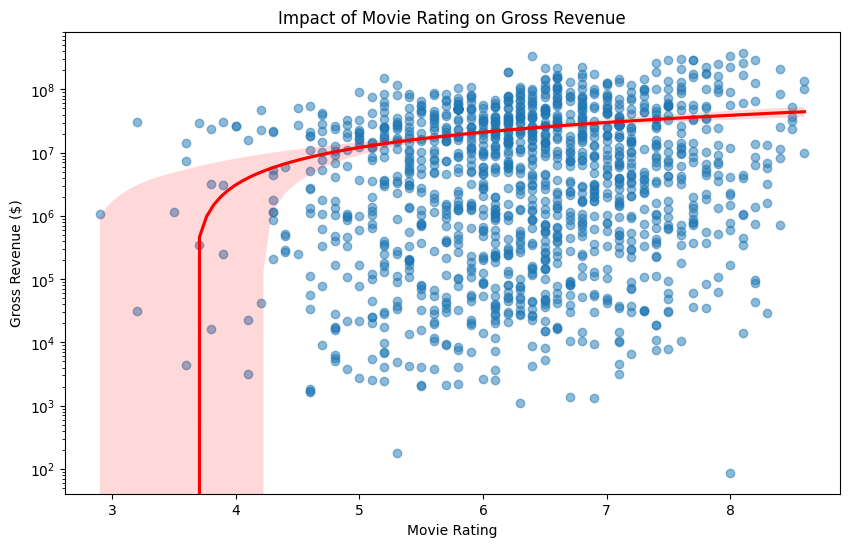

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
file_path = "/content/mystery_series.csv"
df = pd.read_csv(file_path)

# Data Cleaning
df = df.dropna(subset=["Rating", "Gross Revenue"])  # Remove rows with missing values
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")  # Convert Rating to numeric

# Convert Gross Revenue to numeric (removing commas)
df["Gross Revenue"] = df["Gross Revenue"].astype(str).str.replace(",", "").astype(float)

# Remove invalid entries
df = df.dropna().query("Rating > 0 and `Gross Revenue` > 0")

# Compute Correlation
correlation = df["Rating"].corr(df["Gross Revenue"])
print(f"Correlation between Rating and Gross Revenue: {correlation:.3f}")

# Run Regression Analysis
X = sm.add_constant(df["Rating"])  # Adding constant for intercept
y = df["Gross Revenue"]

model = sm.OLS(y, X).fit()
print(model.summary())

# Visualization
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Rating"], y=df["Gross Revenue"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Movie Rating")
plt.ylabel("Gross Revenue ($)")
plt.title("Impact of Movie Rating on Gross Revenue")
plt.yscale("log")  # Log scale to handle large variations
plt.show()


In [ ]:
!pip install ekphrasis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.6 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


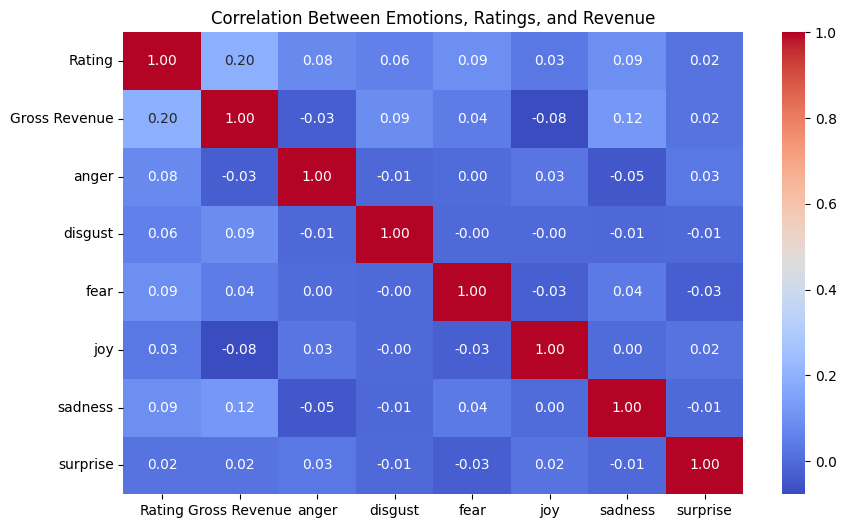

MissingDataError: exog contains inf or nans

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import statsmodels.api as sm
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.dicts.emoticons import emoticons

# Load the dataset
file_path = "/content/mystery_series.csv"
df = pd.read_csv(file_path)

# Ensure necessary columns exist
df = df.dropna(subset=["Synopsis", "Rating", "Gross Revenue"])

# Convert revenue to numeric
df["Gross Revenue"] = df["Gross Revenue"].astype(str).str.replace(",", "").astype(float)
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Ekman Emotion Lexicon (Manually Defined Keywords)
ekman_emotions = {
    "anger": ["angry", "furious", "rage", "revenge", "murder", "hate", "fight"],
    "disgust": ["disgust", "gross", "repulsive", "filthy", "nasty"],
    "fear": ["fear", "scary", "horror", "terrified", "panic", "afraid", "haunted"],
    "joy": ["happy", "joy", "love", "romantic", "friendship", "fun", "excited"],
    "sadness": ["sad", "tragic", "grief", "loss", "death", "depressed"],
    "surprise": ["surprise", "shocking", "unexpected", "twist", "mystery"]
}

# Preprocessing Function
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Extract Emotion Scores
def emotion_analysis(synopsis):
    words = preprocess_text(synopsis)
    emotion_counts = {emotion: sum(words.count(word) for word in words_list) for emotion, words_list in ekman_emotions.items()}
    return emotion_counts

# Apply emotion analysis to each movie
emotion_data = df["Synopsis"].apply(emotion_analysis)
emotion_df = pd.DataFrame(emotion_data.tolist())

# Merge emotion scores with main dataset
df = pd.concat([df, emotion_df], axis=1)

# Correlation Analysis
correlation_matrix = df[["Rating", "Gross Revenue"] + list(ekman_emotions.keys())].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Emotions, Ratings, and Revenue")
plt.show()

# Regression Analysis: Emotion Impact on Revenue
X = sm.add_constant(df[list(ekman_emotions.keys())])  # Independent variables: emotions
y = df["Gross Revenue"]  # Dependent variable

model = sm.OLS(y, X).fit()
print(model.summary())

# Regression Analysis: Emotion Impact on Rating
X = sm.add_constant(df[list(ekman_emotions.keys())])
y = df["Rating"]

model = sm.OLS(y, X).fit()
print(model.summary())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-8-20d48d7e977c>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_revenue.index, y=emotion_revenue.values, palette="coolwarm")


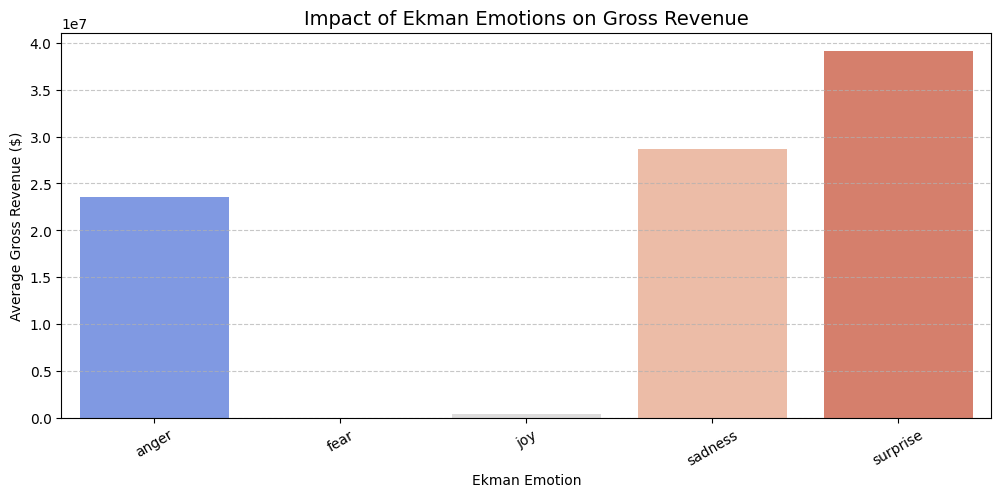

<ipython-input-8-20d48d7e977c>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_rating.index, y=emotion_rating.values, palette="viridis")


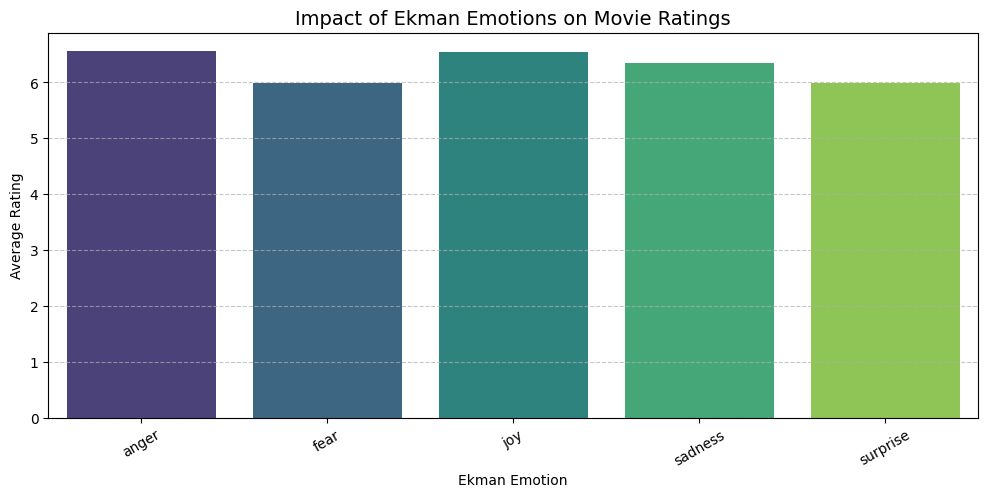

In [ ]:
# Install dependencies
!pip install ekphrasis textblob nltk matplotlib seaborn --quiet

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.dicts.emoticons import emoticons
from nltk.corpus import stopwords
from collections import Counter

# Download necessary resources
nltk.download('stopwords')

# Load the dataset
file_path = "/content/mystery_series.csv"
df = pd.read_csv(file_path)

# Clean column names (remove spaces if any)
df.columns = df.columns.str.strip()

# Convert Gross Revenue to numeric (handle missing values)
df["Gross Revenue"] = df["Gross Revenue"].replace(',', '', regex=True).astype(float)

# Define Ekman emotions
ekman_emotions = {
    "anger": ["rage", "mad", "furious", "resentful"],
    "disgust": ["disgusted", "revolted", "sickened"],
    "fear": ["fearful", "terrified", "nervous", "worried"],
    "joy": ["happy", "joyful", "excited", "cheerful"],
    "sadness": ["sad", "unhappy", "depressed", "down"],
    "surprise": ["surprised", "shocked", "astonished"]
}

# Function to detect Ekman emotions in a text
def detect_emotions(text):
    words = text.lower().split()  # Simple tokenization
    emotion_counts = Counter()
    for emotion, keywords in ekman_emotions.items():
        emotion_counts[emotion] = sum(1 for word in words if word in keywords)
    return emotion_counts

# Apply emotion detection on the "Synopsis" column
df["Emotion Scores"] = df["Synopsis"].fillna("").apply(detect_emotions)

# Extract separate emotion columns
for emotion in ekman_emotions.keys():
    df[emotion] = df["Emotion Scores"].apply(lambda x: x[emotion])

# Aggregate average revenue and rating by dominant emotion
emotion_revenue = df.groupby(df[ekman_emotions.keys()].idxmax(axis=1))["Gross Revenue"].mean()
emotion_rating = df.groupby(df[ekman_emotions.keys()].idxmax(axis=1))["Rating"].mean()

# Plot the impact of emotions on Gross Revenue
plt.figure(figsize=(12, 5))
sns.barplot(x=emotion_revenue.index, y=emotion_revenue.values, palette="coolwarm")
plt.title("Impact of Ekman Emotions on Gross Revenue", fontsize=14)
plt.xlabel("Ekman Emotion")
plt.ylabel("Average Gross Revenue ($)")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the impact of emotions on Ratings
plt.figure(figsize=(12, 5))
sns.barplot(x=emotion_rating.index, y=emotion_rating.values, palette="viridis")
plt.title("Impact of Ekman Emotions on Movie Ratings", fontsize=14)
plt.xlabel("Ekman Emotion")
plt.ylabel("Average Rating")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
